# About the Data
This data set contains 13 clinicopathologic features aiming to predict recurrence of well differentiated thyroid cancer. The data set was collected in duration of 15 years and each patient was followed for at least 10 years.
Citation: 
Borzooei,Shiva and Tarokhian,Aidin. (2023). Differentiated Thyroid Cancer Recurrence. UCI Machine Learning Repository. https://doi.org/10.24432/C5632J.

### Import Data
First, we will import the data from the dataset using Panda

In [105]:
import pandas as pd

file_path = 'Thyroid_Diff.csv'
thyroid_data = pd.read_csv(file_path)

thyroid_data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


### Data Quality: Introducing data impurities
According to the UCI website, this data contains mostly clean data. Therefore, we will run a few commands to introduce missing values and duplicate data.

##### 1. Introduce Missing Values
First, we will randomly choose 3% and introudce missing values denoted by a '?' to the columns 'Age', 'Thyroid Function' and 'Physical Examination'.

In [106]:
import numpy as np

np.random.seed(177)

columns_with_missing_values = ['Age','Thyroid Function', 'Physical Examination']

for column in columns_with_missing_values:
    indices = np.random.choice(thyroid_data.index, size=int(len(thyroid_data) * 0.03), replace=False)
    thyroid_data[column] = thyroid_data[column].astype('object')
    thyroid_data.loc[indices, column] = '?'

thyroid_data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


##### 2. Add artificial outliers
Next, let's add some outliers to the data. We will take 4 records and then change the age values to low and high outlier values.

In [107]:
outlier_data = thyroid_data.iloc[:4].copy()

outlier_ages = [1, 3, 115, 109]
outlier_data['Age'] = outlier_ages


thyroid_data = pd.concat([thyroid_data, outlier_data], ignore_index=True)

thyroid_data.tail()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
382,67,M,Yes,No,No,?,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes
383,1,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
384,3,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
385,115,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
386,109,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


##### 3. Duplicate Values
Next, we will randomly pick 2% of the dataset and then copy them to introduce duplicate values.

In [108]:
num_duplicates = int(len(thyroid_data) * 0.02)

duplicate_indices = np.random.choice(thyroid_data.index, size=num_duplicates, replace=False)
duplicates = thyroid_data.loc[duplicate_indices].copy()


thyroid_data = pd.concat([thyroid_data, duplicates], ignore_index=True)


In [109]:
thyroid_data.to_csv('Impure_Thyroid_Data.csv', index = False)

### Dealing with Data Quality Issues

Now that we have artificially introduced some impurities in the dataset, we will deal with them accordingly.


### Missing values

Since there are missing values with '?', we will count them and then replace them with Nan

In [110]:
import numpy as np

data = pd.read_csv('Impure_Thyroid_Data.csv')

data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 394
Number of attributes = 17
Number of missing values:
	Age: 12
	Gender: 0
	Smoking: 0
	Hx Smoking: 0
	Hx Radiothreapy: 0
	Thyroid Function: 11
	Physical Examination: 12
	Adenopathy: 0
	Pathology: 0
	Focality: 0
	Risk: 0
	T: 0
	N: 0
	M: 0
	Stage: 0
	Response: 0
	Recurred: 0


There are three columns with missing values: Age, Thyroid Function and Physical Examination. Since Age has numerical values, we will replace the missing values with the mean of the age column and remove the missing values for Thyroid Function and Physical Examination. However, before we replace the missing Age values with the mean, we will first deal with the Outliers so that we don't skew the data.

##### Remove the missing values for 'Physical Examination' and 'Thyroid Function'

In [111]:
print('Number of rows in original data = %d' % (data.shape[0]))

data = data.dropna(subset= ['Physical Examination', 'Thyroid Function'])
print('Number of rows after discarding missing values = %d' % (data.shape[0]))

Number of rows in original data = 394
Number of rows after discarding missing values = 371


##### Before we replace the missing values for Age with the mean, we will first deal with the Outliers.

### Outliers

Now, we will look at the Outliers in the 'Age' column. 

<Axes: >

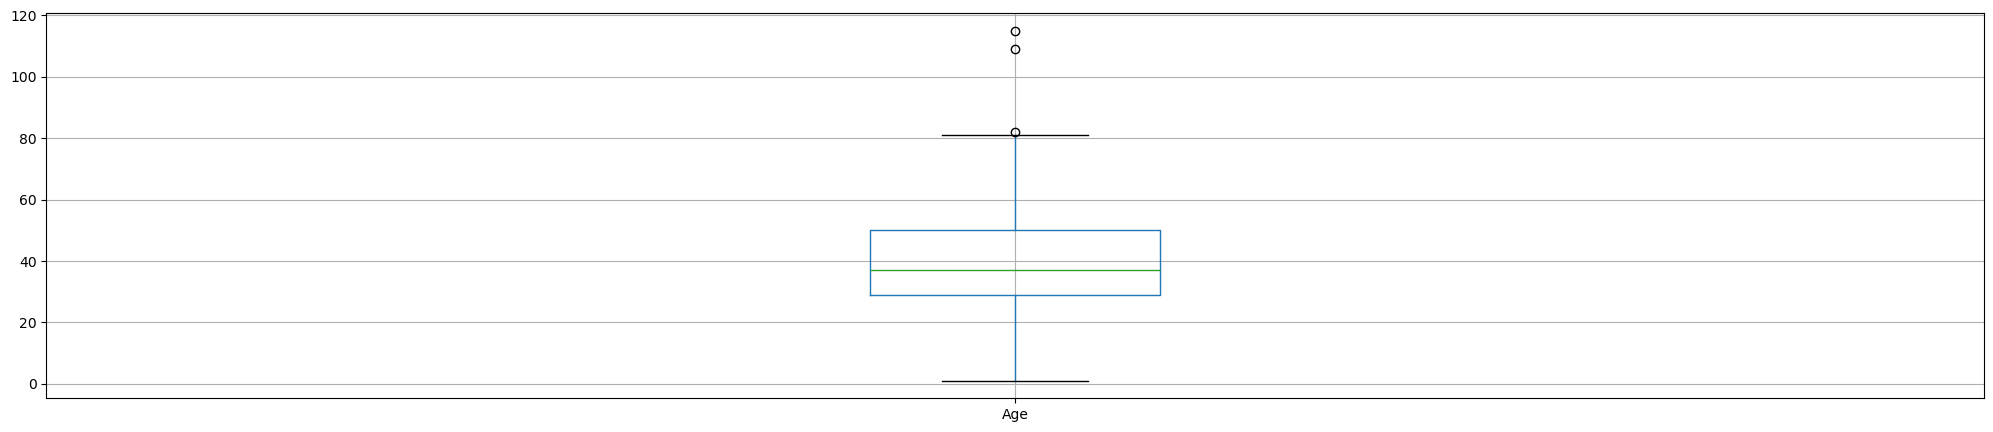

In [112]:
%matplotlib inline

data['Age'] = pd.to_numeric(data['Age'])
data.boxplot(column= ['Age'], figsize = (25, 5))

### Now, we will calculate the z score for the age column.

In [113]:
data2 = data['Age']
Z = (data2-data2.mean())/data2.std()
Z[20:25]

22   -0.281929
23    1.854151
24    1.225892
25   -0.470407
26    0.157852
Name: Age, dtype: float64

Now, we will discard the rows with Z > 3 or Z <=-3

In [114]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = data[(Z <= 3) & (Z >= -3) | data['Age'].isna()]
print('Number of rows after discarding outliers = %d' % (Z2.shape[0]))

Number of rows before discarding outliers = 371
Number of rows after discarding outliers = 369


In [115]:
data = Z2

In [116]:
data2 = data
print('Number of instances = %d' % (data2.shape[0]))

print('Number of missing values:')
for col in data2.columns:
    print('\t%s: %d' % (col,data2[col].isna().sum()))

Number of instances = 369
Number of missing values:
	Age: 12
	Gender: 0
	Smoking: 0
	Hx Smoking: 0
	Hx Radiothreapy: 0
	Thyroid Function: 0
	Physical Examination: 0
	Adenopathy: 0
	Pathology: 0
	Focality: 0
	Risk: 0
	T: 0
	N: 0
	M: 0
	Stage: 0
	Response: 0
	Recurred: 0


In [117]:
data.to_csv('cleaned_dataset.csv', index = False)

In [118]:
data = pd.read_csv('cleaned_dataset.csv')
med = data['Age'].median()
data['Age'] = data['Age'].fillna(med).round().astype(int)

data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [119]:
data.to_csv('cleaned_data2.csv', index = False)

In [120]:
data = pd.read_csv('cleaned_data2.csv')

### Duplicate Values
Let's find duplicate values in the dataset.

In [121]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data.loc[[11,28]]

Number of duplicate rows = 21


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
11,49,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
28,37,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


Now, we'll remove the duplicate data from the dataset.


In [122]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data2 = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

data = data2


Number of rows before discarding duplicates = 369
Number of rows after discarding duplicates = 348


Now, we will save the cleaned dataset for further processing.

In [123]:
data.to_csv('cleaned_Thyroid_data.csv', index = False)

In [124]:
import pandas as pd
data = pd.read_csv('cleaned_Thyroid_data.csv')

## Data Visualization

Having our initial data visualized can help us assess and interpret the data visually for human understanding. 
Now that we have clean data, we will use bar graphs, pie charts and other visual methods to visualize some of the values.

#### 1. Distribution of Male and Female 

This code snippet utilizes Matplotlib and Seaborn libraries to create a histogram plot visualizing the distribution of ages for males and females. The figure size is specified to ensure a clear visualization, and Seaborn's histplot() function is employed to generate the histogram, stacking the distributions for each gender while incorporating a kernel density estimate for smoother visualization. The plot is annotated with appropriate titles, labels, and a legend, providing clarity on the displayed data. Finally, the layout is adjusted, and the plot is shown, offering a clear insight into the age distribution differences between genders.

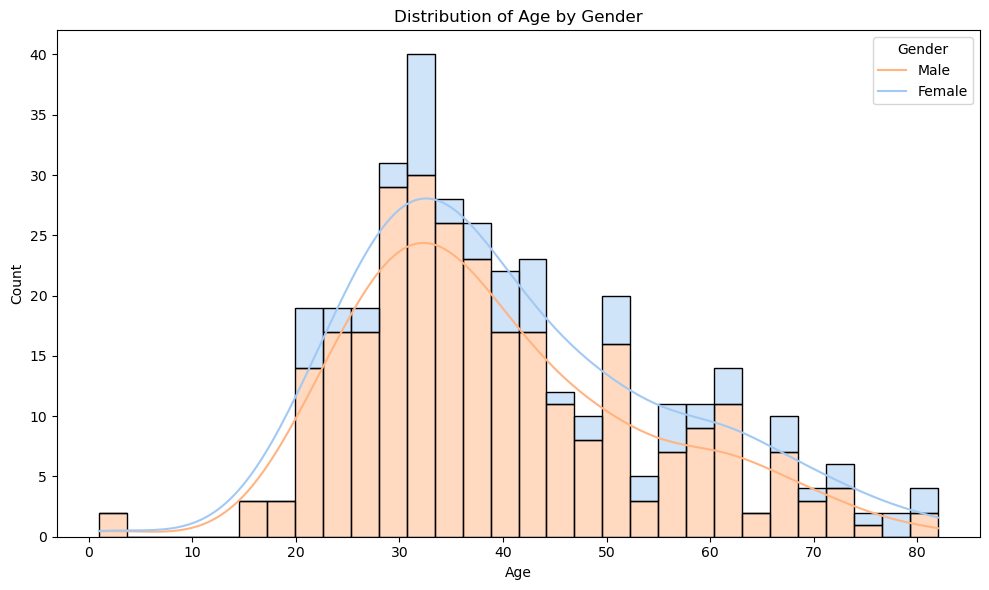

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Age", hue="Gender", multiple="stack", bins=30, palette="pastel", kde=True, hue_order=['M', 'F'])
plt.title('Distribution of Age by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.tight_layout()

plt.show()

#### 2. Distribution of Thyroid Function using Pie Chart

This code segment aims to visualize the distribution of thyroid function statuses using a pie chart. It begins by calculating the counts of each thyroid function status from the dataset. Then, a pie chart is created with the calculated counts, labeling each segment with the corresponding thyroid function status and displaying the percentage contribution of each status. The chart is configured with a starting angle of 140 degrees and a pastel color palette for aesthetic appeal. Finally, the title is set, and the layout is adjusted before displaying the pie chart, providing a clear depiction of the distribution of thyroid function statuses.

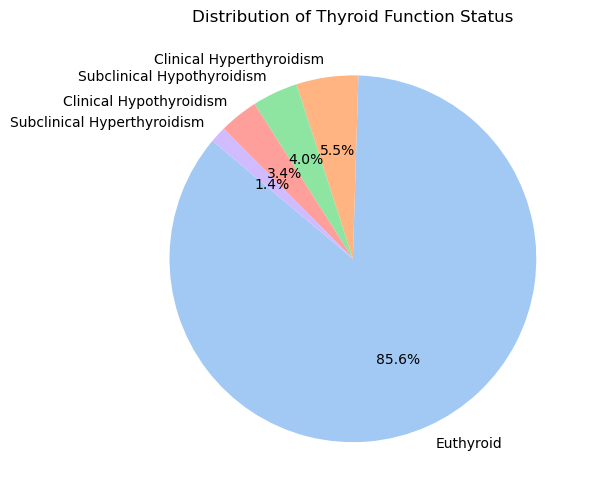

In [126]:
thyroid_function_counts = data['Thyroid Function'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(thyroid_function_counts, labels=thyroid_function_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Thyroid Function Status')
plt.tight_layout()

plt.show()

#### 3. Smoking History among patients using Bar Graphs

This code segment visualizes the smoking history among patients using a bar graph. It first calculates the counts of different smoking histories from the dataset. Then, a bar graph is created using Seaborn's barplot() function, with the x-axis representing the smoking history categories and the y-axis representing the corresponding counts. The plot is styled with a pastel color palette for a visually appealing display. Titles for the graph, x-axis, and y-axis are added to provide context and clarity. Finally, the layout is adjusted before displaying the bar graph, offering a clear representation of the smoking history distribution among patients.

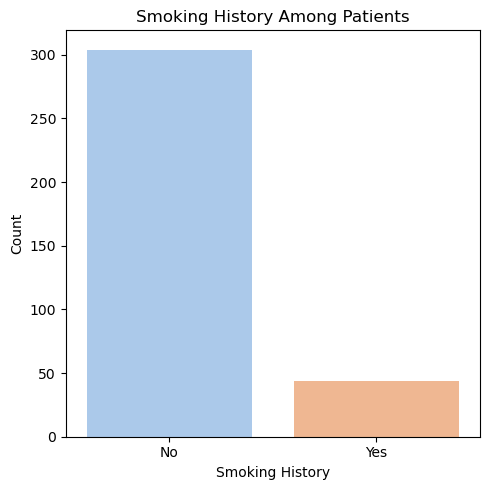

In [127]:
smoking_history_counts = data['Smoking'].value_counts()

plt.figure(figsize=(5, 5))
sns.barplot(x=smoking_history_counts.index, y=smoking_history_counts.values, palette="pastel")
plt.title('Smoking History Among Patients')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

#### 4. Distribution of Risk level among patients using Pie Chart

This code snippet aims to visualize the distribution of risk levels among patients using a pie chart. It begins by calculating the counts of each risk level from the dataset. Then, a pie chart is created with the calculated counts, labeling each segment with the corresponding risk level and displaying the percentage contribution of each level. The chart is configured with a starting angle of 140 degrees and styled with a pastel color palette for aesthetic appeal. Finally, the title is set, and the layout is adjusted before displaying the pie chart, providing a clear depiction of the distribution of risk levels among patients.

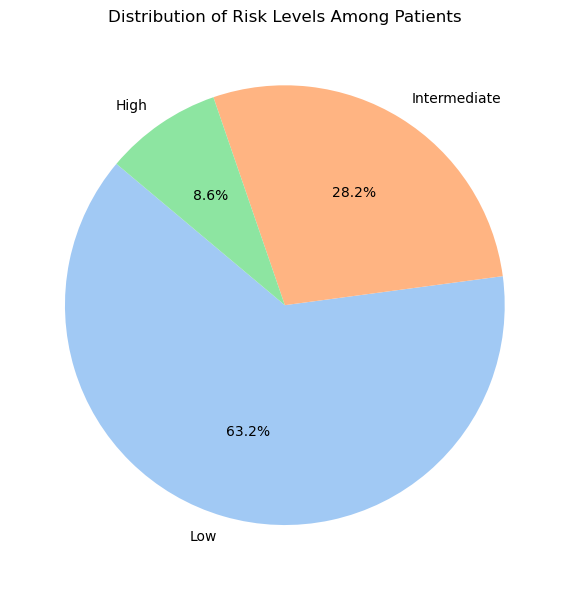

In [128]:
risk_level_counts = data['Risk'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(risk_level_counts, labels=risk_level_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribution of Risk Levels Among Patients')
plt.tight_layout()

plt.show()

#### 5. Reponse to Treatment using Bar Graph


This code segment is dedicated to visualizing the response to treatment among patients using a bar graph. It begins by computing the counts of different response categories from the dataset. Then, a bar graph is generated using Seaborn's barplot() function, where the x-axis represents the response categories and the y-axis denotes the corresponding counts. The plot is styled with a pastel color palette for enhanced visual appeal. Pertinent titles for the graph, x-axis, and y-axis are added to offer context and clarity to the visualization. Additionally, the x-axis labels are rotated by 45 degrees to prevent overlapping. Lastly, the layout is adjusted before displaying the bar graph, providing a comprehensive representation of the response to treatment among patients.

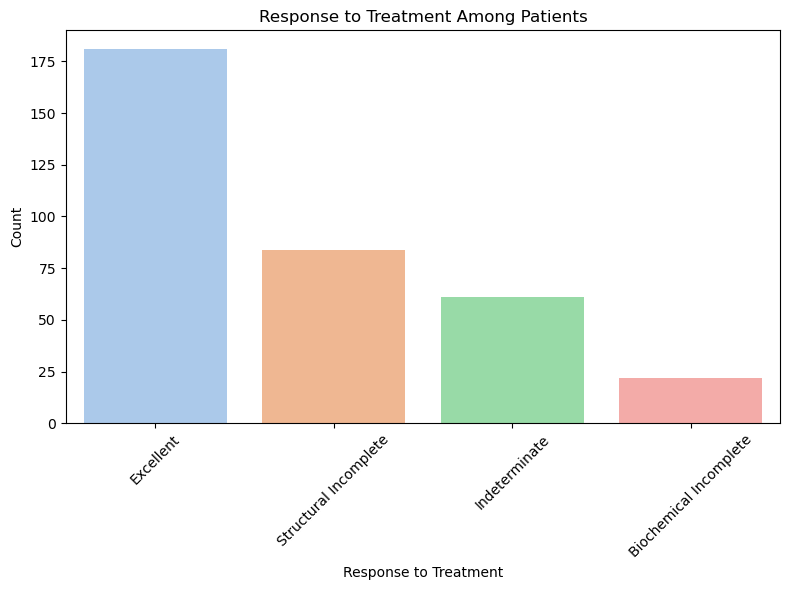

In [129]:
response_to_treatment_counts = data['Response'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=response_to_treatment_counts.index, y=response_to_treatment_counts.values, palette="pastel")
plt.title('Response to Treatment Among Patients')
plt.xlabel('Response to Treatment')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()

### Shuffling Datasets


This code segment shuffles datasets using Python's libraries such as os, numpy, and pandas. Initially, it imports the necessary modules: os for operating system functionalities, numpy as np for numerical operations, and pandas as pd for data manipulation. It defines the file path to the dataset and reads the CSV file into a pandas DataFrame, accounting for potential missing values specified as 'NA' or '?'. Next, the DataFrame is shuffled using np.random.permutation to randomize the order of rows. The index of the DataFrame is reset to reflect the shuffled order, and the original index is dropped for consistency. Finally, the shuffled DataFrame is returned for further analysis or processing.

In [130]:
import os
import numpy as np
import pandas as pd

path = "./"

filename_read = os.path.join(path,"cleaned_Thyroid_data.csv")
df = pd.read_csv(filename_read, na_values=['NA','?'])

df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,37,M,Yes,No,No,Euthyroid,Single nodular goiter-left,Left,Papillary,Multi-Focal,High,T4a,N1b,M1,IVB,Structural Incomplete,Yes
1,38,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T1b,N0,M0,I,Excellent,No
2,33,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
3,32,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
4,34,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,High,T3a,N1a,M0,I,Biochemical Incomplete,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,56,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
344,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
345,61,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Intermediate,T3a,N0,M0,II,Excellent,No
346,26,F,No,Yes,No,Subclinical Hyperthyroidism,Single nodular goiter-right,No,Hurthel cell,Uni-Focal,Low,T2,N0,M0,I,Excellent,No


### Sorting Dataframes

This code segment sorts a DataFrame by the 'Age' column in ascending order. Initially, it sorts the DataFrame df based on the values in the 'Age' column, setting the ascending parameter to True, indicating an ascending sort order. Subsequently, it prints the sorted DataFrame using the print(df) statement. Then, it prints the value of the 'Age' column for the first row using both .iloc[0] and .loc[0] indexing methods, demonstrating two ways to access the first row's 'Age' value.

In [131]:
df = df.sort_values(by='Age', ascending=True)
print(df)

     Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
50     1      F      No         No              No        Euthyroid   
323    3      F      No        Yes              No        Euthyroid   
239   15      F      No         No              No        Euthyroid   
76    17      F      No         No              No        Euthyroid   
62    17      F      No        Yes              No        Euthyroid   
..   ...    ...     ...        ...             ...              ...   
53    79      M     Yes         No              No        Euthyroid   
258   80      F     Yes         No              No        Euthyroid   
123   81      M     Yes         No             Yes        Euthyroid   
253   81      F      No         No              No        Euthyroid   
77    82      M     Yes         No              No        Euthyroid   

            Physical Examination Adenopathy       Pathology     Focality  \
50    Single nodular goiter-left         No  Micropapillary    Uni-Foca

In [132]:
print("The first age is: {}".format(df['Age'].iloc[0]))

The first age is: 1


In [133]:
print("The first age is: {}".format(df['Age'].loc[0]))

The first age is: 37


### Saving A Dataset
The data 

This code segment demonstrates saving a dataset after shuffling. Initially, it imports the necessary libraries: os for operating system functionalities, pandas as pd for data manipulation, and numpy as np for numerical operations. It defines the file paths for reading the original dataset and writing the shuffled dataset. The CSV file is then read into a pandas DataFrame, considering 'NA' and '?' as missing values. Next, the DataFrame is shuffled using np.random.permutation to randomize the order of rows. Finally, the shuffled DataFrame is saved to a new CSV file specified by filename_write, and the message "Done" is printed to indicate successful completion of the operation.

In [134]:
import os
import pandas as pd
import numpy as np

path = "./"

filename_read = os.path.join(path, "cleaned_Thyroid_data.csv")
filename_write = os.path.join(path, "cleaned_Thyroid_data-shuffled.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])
df = df.reindex(np.random.permutation(df.index))
df.to_csv(filename_write,index=False)   # Specify index = false to not write row numbers
print("Done")

Done


### Dropping Frames
Some fields are of no value and can be dropped.  The following code removes the Thyroid Function column from the dataset.

In [135]:
import os
import pandas as pd
import numpy as np

path = "./"

filename_read = os.path.join(path,"cleaned_Thyroid_data.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])

print("Before drop: {}".format(df.columns))
df.drop('Thyroid Function', axis=1, inplace=True)
print("After drop: {}".format(df.columns))
df[0:5]

Before drop: Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')
After drop: Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk',
       'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


### Calculated Fields
It is possible to add new fields to the dataframe that are calculated from the other fields.  We can create a new column called "Age_months" which represents the age in months.

In [136]:
import os
import pandas as pd
import numpy as np

path = "./"

filename_read = os.path.join(path,"cleaned_Thyroid_data.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])
# Adding a new column for Age in months
df.insert(1, 'Age_months', (df['Age'] * 12).astype(int))
df

,Age,Age_months,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,324,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,408,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,360,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,744,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,744,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,81,972,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
344,72,864,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
345,61,732,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes
346,1,12,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No


### Feature Normalization
A normalization allows numbers to be put in a standard form so that two values can easily be compared. The Z-score normalization won't be the best choice for this data set so we decided to use one-hot encoding normalization technique which creates binary columns for each category in the "Gender" column and assigns 0 or 1 based on the presence of each category. 

In [137]:
import os 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import numpy as np
from scipy.stats import zscore

path = "./"

filename_read = os.path.join(path,"cleaned_Thyroid_data.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])

# Applying one-hot encoding to the "Gender" column
df = pd.get_dummies(df, columns=['Gender'], prefix='Gender')
df

,Age,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,Gender_F,Gender_M
0,27,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No,True,False
1,34,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,True,False
2,30,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,True,False
3,62,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,True,False
4,62,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,81,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes,False,True
344,72,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes,False,True
345,61,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes,False,True
346,1,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No,True,False


### Missing Values

Another way to deal with missing values is to either replace the missing values with the median value for that column, or just drop the row.


In [138]:
import os
import pandas as pd
import numpy as np
from scipy.stats import zscore

path = "./"

filename_read = os.path.join(path, "Impure_Thyroid_Data.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])
med = df['Age'].median()
df['Age'] = df['Age'].fillna(med)

# df = df.dropna() # this will drop rows with NaN values

### Concatenating Rows and Columns
Rows and columns can be concatenated together to form new data frames. Columns Age, Gender, & Smoking were used to create a new data frame.

In [139]:
import os 
import pandas as pd

path = "./"

filename_read = os.path.join(path,"cleaned_Thyroid_data.csv")
df = pd.read_csv(filename_read,na_values=['NA','?'])
col_age = df['Age']
col_gender = df['Gender']
col_smoking = df['Smoking']
result = pd.concat([col_age,col_gender,col_smoking],axis=1)
result

,Age,Gender,Smoking
0,27,F,No
1,34,F,No
2,30,F,No
3,62,F,No
4,62,F,No
...,...,...,...
343,81,M,Yes
344,72,M,Yes
345,61,M,Yes
346,1,F,No


# Training/Test Split
This code will split the data into both a training set and a test set intended for training a model based on the data. We will be splitting the data based on the patients' response to the cancer treatments.

First we import the data from the CSV file and print the first five rows of the DataFrame.

In [140]:
import pandas as pd
import io
import numpy as np
import os
from sklearn.model_selection import train_test_split

path = "./"
    
filename = os.path.join(path,"cleaned_Thyroid_data.csv")    
df = pd.read_csv(filename,na_values=['NA','?'])

df[0:5]

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


We then encode the label 'Response' to turn it into a numerical value and add it as a new column for easier processing.

In [141]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['encoded_response'] = le.fit_transform(df['Response'])

df[0:5]

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,encoded_response
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No,2
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,1
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,1
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,1
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No,1


Finally we split the data into two different sets: one for training and one for testing. We are also ensuring that it is reproducible by giving a specific seed, 22. Then, we print the tuples representing the dimensions of each array that has been created to demonstrate the size of the new data sets.

In [142]:
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(df[['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']], df['encoded_response'], test_size=0.20, random_state=22)
print("x_train:")
print(x_train.shape)

print("\ny_train:")
print(y_train.shape)

print("\nx_test:")
print(x_test.shape)

print("\ny_test:")
print(y_test.shape)


x_train:
(278, 17)

y_train:
(278,)

x_test:
(70, 17)

y_test:
(70,)


# Aggregation

With so many varying forms of data available, it can be confusing to understand patterns without aggregating relevant pieces of data. By aggregating data, we may group together multiple objects into one object and help meaningfully summarize the data to be processed. 

In [143]:
import pandas as pd

file_path = 'cleaned_Thyroid_data.csv'
thyroid_data = pd.read_csv(file_path)

data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


Here, we may summarize the data by grouping the "Thyroid Function" category with the average age of the patients.

In [144]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


file_path = 'cleaned_Thyroid_data.csv'
thyroid_data = pd.read_csv(file_path)

mean_age_by_thyroid_function = thyroid_data.groupby('Thyroid Function')['Age'].mean()

print(mean_age_by_thyroid_function)


Thyroid Function
Clinical Hyperthyroidism       41.789474
Clinical Hypothyroidism        39.750000
Euthyroid                      40.161074
Subclinical Hyperthyroidism    29.600000
Subclinical Hypothyroidism     48.642857
Name: Age, dtype: float64


Another form of aggregation is applying the count() function. Here we will count the number of patients among each of the identified thyroid cancer functions.

In [145]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


file_path = 'cleaned_Thyroid_data.csv'
thyroid_data = pd.read_csv(file_path)

count_by_thyroid_function = thyroid_data.groupby(['Thyroid Function'])['Thyroid Function'].count() 

print(count_by_thyroid_function)


Thyroid Function
Clinical Hyperthyroidism        19
Clinical Hypothyroidism         12
Euthyroid                      298
Subclinical Hyperthyroidism      5
Subclinical Hypothyroidism      14
Name: Thyroid Function, dtype: int64


Finally, we can group multiple columns while also applying different aggregate functions. The following will display the min and max ages among the data for each of the Thyroid cancer functions, seperated by the smoking category.

In [146]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


file_path = 'cleaned_Thyroid_data.csv'
thyroid_data = pd.read_csv(file_path)

mean_age_by_thyroid_function = thyroid_data.groupby(['Smoking','Thyroid Function'])['Age'].aggregate(['min','max'])

print(mean_age_by_thyroid_function)

                                     min  max
Smoking Thyroid Function                     
No      Clinical Hyperthyroidism      23   68
        Clinical Hypothyroidism       22   76
        Euthyroid                      1   81
        Subclinical Hyperthyroidism   22   43
        Subclinical Hypothyroidism    20   72
Yes     Clinical Hyperthyroidism      28   78
        Clinical Hypothyroidism       59   59
        Euthyroid                     21   82
        Subclinical Hypothyroidism    67   71


# Sampling
Taking various samples of the data set, demonstrating sampling both with and without replacement. This is useful for performing analyses and developing prototype models or algorithms quickly, or conducting exploratory data analysis.

First we display the first five records in the table.


In [147]:
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


The next code shows 3 randomly selected entries from the data set without replacement.

In [148]:
sample = data.sample(n=3)
sample

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
33,31,F,No,No,No,Clinical Hyperthyroidism,Diffuse goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
283,37,M,No,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes
174,33,M,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N1b,M0,I,Excellent,No


Another example without replacement, this time selecting 3% of the data with a random seed value of 1.

In [149]:
sample = data.sample(frac=0.03, random_state=1)
sample

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
85,26,F,No,Yes,No,Subclinical Hyperthyroidism,Single nodular goiter-right,No,Hurthel cell,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
191,29,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N1a,M0,I,Indeterminate,No
107,37,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
105,23,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T2,N0,M0,I,Indeterminate,No
123,41,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
93,33,F,No,No,No,Clinical Hypothyroidism,Single nodular goiter-right,Right,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
345,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes
11,49,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
147,38,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
212,52,F,No,No,No,Euthyroid,Multinodular goiter,No,Follicular,Uni-Focal,Low,T3a,N0,M0,I,Biochemical Incomplete,No


In this last example, a random sample of 3% of the data is shown, but replacement is enabled and duplicate entries are allowed.

In [150]:
sample = data.sample(frac=.03, replace=True, random_state=1)
sample

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
37,45,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
235,19,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T3a,N0,M0,I,Excellent,No
72,27,F,No,No,No,Subclinical Hyperthyroidism,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No
255,55,M,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Intermediate,T3a,N0,M0,II,Indeterminate,No
203,31,F,No,No,No,Euthyroid,Single nodular goiter-left,Left,Papillary,Uni-Focal,Intermediate,T2,N1b,M0,I,Structural Incomplete,Yes
133,35,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
335,51,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,High,T4a,N1a,M1,II,Structural Incomplete,Yes
144,40,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Multi-Focal,Low,T2,N0,M0,I,Excellent,No
129,33,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
71,17,F,No,Yes,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No


# Discretization

Discretization transforms continuous-valued attributes to a categorical attributes.  Since the Thyroid data we've been using thus far doesn't have any continuous-valued attributes, we'll look at the weight of cars listed in the auto-mpg data set instead.

First, we'll plot a histogram that shows the distribution of the attribute values.

weight
3504    1
3693    1
3436    1
3433    1
3449    1
       ..
2665    1
2370    1
2790    1
2295    1
2625    1
Name: count, Length: 351, dtype: int64

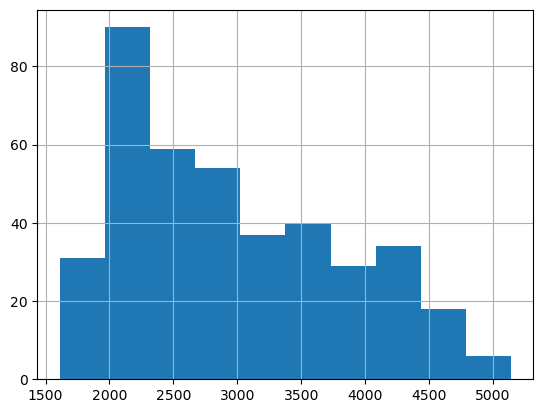

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

mpg_data = pd.read_csv('./auto-mpg.csv')

mpg_data['weight'].hist(bins=10)
mpg_data['weight'].value_counts(sort=False)

The cut() function can be used to implement an "equal width method", which will discretize the attribute into 4 bins of similar interval widths.  Then, we'll use the value_counts() function to determine the number of instances in each bin.

In [152]:
bins = pd.cut(mpg_data['weight'],4)
bins.value_counts(sort=False)

weight
(1609.473, 2494.75]    146
(2494.75, 3376.5]      125
(3376.5, 4258.25]       86
(4258.25, 5140.0]       41
Name: count, dtype: int64

Or, we can use the qcut() function to partition the values into 4 bins such that each bin has nearly the same number of instances.  
This is known as the "equal frequency method".

In [153]:
bins = pd.qcut(mpg_data['weight'],4)
bins.value_counts(sort=False)

weight
(1612.999, 2223.75]    100
(2223.75, 2803.5]       99
(2803.5, 3608.0]        99
(3608.0, 5140.0]       100
Name: count, dtype: int64

### Principal Component Analysis

Principal Component Analysis (PCA) is a method to help convert a high-dimensional space into a lower-dimensional space. This can help reduce the complexity of the data, as well as any noise. PCA is a great technique to create a way to visualize complex data and is well used in machine learning. 

PCA utilizes covariance to analyze the data, and will require numerical representations. Since the majority of the Thyroid data is categorical, these fields will need to be one-hot encoded to fit this requirement. To simplify things, we will drop 

In [154]:
import pandas as pd


file_path = 'cleaned_Thyroid_data.csv'
thyroid_pca_df = pd.read_csv(file_path)

thyroid_pca_df = thyroid_pca_df.drop(['Hx Smoking','Physical Examination','Pathology',
                                      'Hx Radiothreapy','Risk','Stage','Response',
                                      'Thyroid Function','Recurred','Adenopathy', 'Focality',
                                      'T', 'N','M'], axis=1)

print("PCA-simplified Data")
thyroid_pca_df.head()

PCA-simplified Data


,Age,Gender,Smoking
0,27,F,No
1,34,F,No
2,30,F,No
3,62,F,No
4,62,F,No


After simplifying the data fields, we will now one-hot encode each of the categorical columns.

In [155]:
thyroid_encoded = pd.get_dummies(thyroid_pca_df, dtype=int,columns=['Smoking','Gender'])
thyroid_encoded

,Age,Smoking_No,Smoking_Yes,Gender_F,Gender_M
0,27,1,0,1,0
1,34,1,0,1,0
2,30,1,0,1,0
3,62,1,0,1,0
4,62,1,0,1,0
...,...,...,...,...,...
343,81,0,1,0,1
344,72,0,1,0,1
345,61,0,1,0,1
346,1,1,0,1,0


With our data now numerical, we may apply the PCA function for analysis.

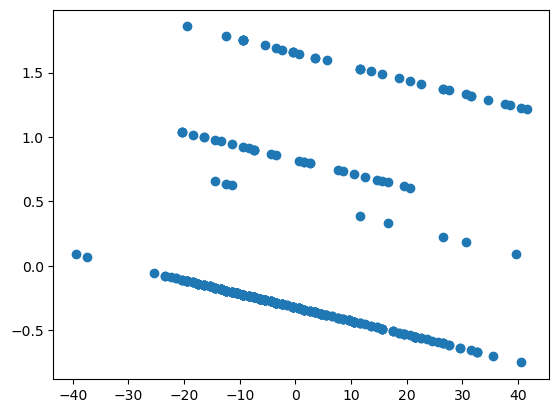

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

numComponents = 2
pca = PCA(n_components = numComponents)

result = pca.fit_transform(thyroid_encoded)

plt.scatter(result[:,0],result[:,1])



In the scatter plot, data points are clustered in certain areas that may suggest that these parts are similar, such as a correlation between older male smokers. The plot may be clearer with more continuous data, as one-hot encoding isn't always best practice.

### Contributions:
Anish Mishra: Found data set, uncleaned/cleaned data set

Andy Xu: Aggregation, PCA

Ajaydeep Singh: Calculated Fields, Dropping Frames

Rominkumar Akoliya: N/A

Brennan Moran: Sampling, Training/Test Split

David Cameron: Shuffling Dataframes, Saving a Dataframe

Jeffrey Bianucci: Discretization, Missing Values

Sean Russel Agarrado: Sorting Dataframes